In [1]:
import numpy as np
import pandas as pd
import sys, os, time
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sys.path.append('../..')

In [3]:
from src.sampling_algorithms.event_time_samplers import gaussian_bounce
from src.utils import gaussian_grad_potential_fn, get_xtv,interp, get_first_moment, get_var, get_second_moment
from src.sampling_algorithms import CoordinateSampler
from src.plots.arrow_plot import arrow_plot

In [4]:
# init values
chain_length = 4
init_x = np.array([np.random.rand() for _ in range(chain_length)])
v = np.array([np.random.rand() for _ in range(chain_length)])
refresh_rate = 0.1

mus = np.repeat(0,chain_length)
sigs = np.repeat(1.,chain_length)
Sig = np.diag(sigs)

grad_potential_fn = gaussian_grad_potential_fn(mu=mus, Sig=Sig)
bounce_fn = gaussian_bounce(mu=mus, Sig=Sig)


In [5]:
cs = CoordinateSampler(init_x, grad_potential_fn, bounce_fn, refresh_rate)

In [6]:
nsim = 10**4

In [7]:
res = cs.simulate(nsim)

In [8]:
x1,v1,t1=get_xtv(res,0)
x2,v2,t2=get_xtv(res,1)

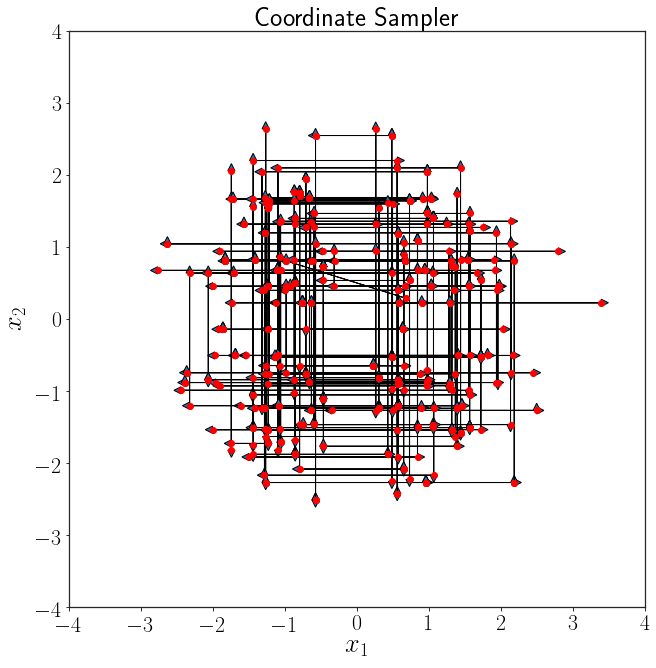

In [14]:
plot_limit = 500
fig_size = (10,10)
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25

font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)


fig = plt.figure(figsize=fig_size,frameon =True)
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height])
ax.set_title("Coordinate Sampler")
ax.set_xlabel("$x_1$",fontsize='large', fontweight='bold')
ax.set_ylabel("$x_2$",fontsize='large', fontweight='bold')
ax.set_xlim((-4,4))
ax.set_ylim((-4,4))
arrow_plot(x1[:plot_limit],x2[:plot_limit])
fig.savefig('./cs.eps', format='eps', dpi=1200)

